In [ ]:
Assignment 1: Sales and Effectiveness Analysis
Objective:
Explore the relationship between marketing spend, sales, and drug effectiveness across different regions and age groups. Create visualizations using matplotlib and seaborn.
Instructions:
1.	Load the dataset.
2.	Perform data cleaning (check for missing values, duplicates).
3.	Create the following visualizations:
o	A bar plot showing total sales per region.
o	A scatter plot to visualize the relationship between Marketing_Spend and Sales.
o	A boxplot comparing drug effectiveness across different age groups.
o	A line plot showing the sales trend for each product over different trial periods.
o	A heatmap of the correlation between Sales, Marketing_Spend, and Effectiveness.
4.	Based on the visualizations, summarize any patterns or trends you observe.
Expected Outcome:
•	Insights on how marketing spend impacts sales.
•	Analysis of which age groups have higher drug effectiveness.
•	Regional sales distribution.




Sales by Region:
          Region   Sales
0           Asia  255000
1         Europe  180000
2  North America  430000

Sales by Product:
  Product_Name   Sales
0     ColdCure  180000
1  HeadacheFix  255000
2   PainRelief  430000


C:\Users\likit\AppData\Local\Temp\ipykernel_27408\1695882898.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=region_sales, x='Region', y='Sales', palette='viridis')


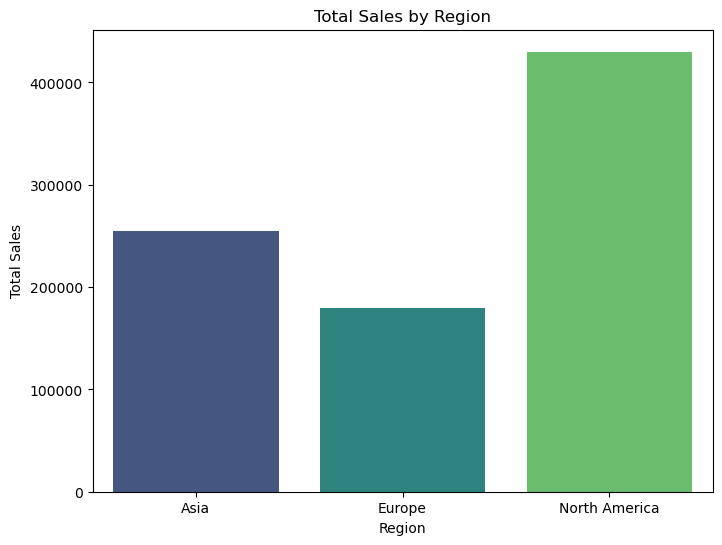

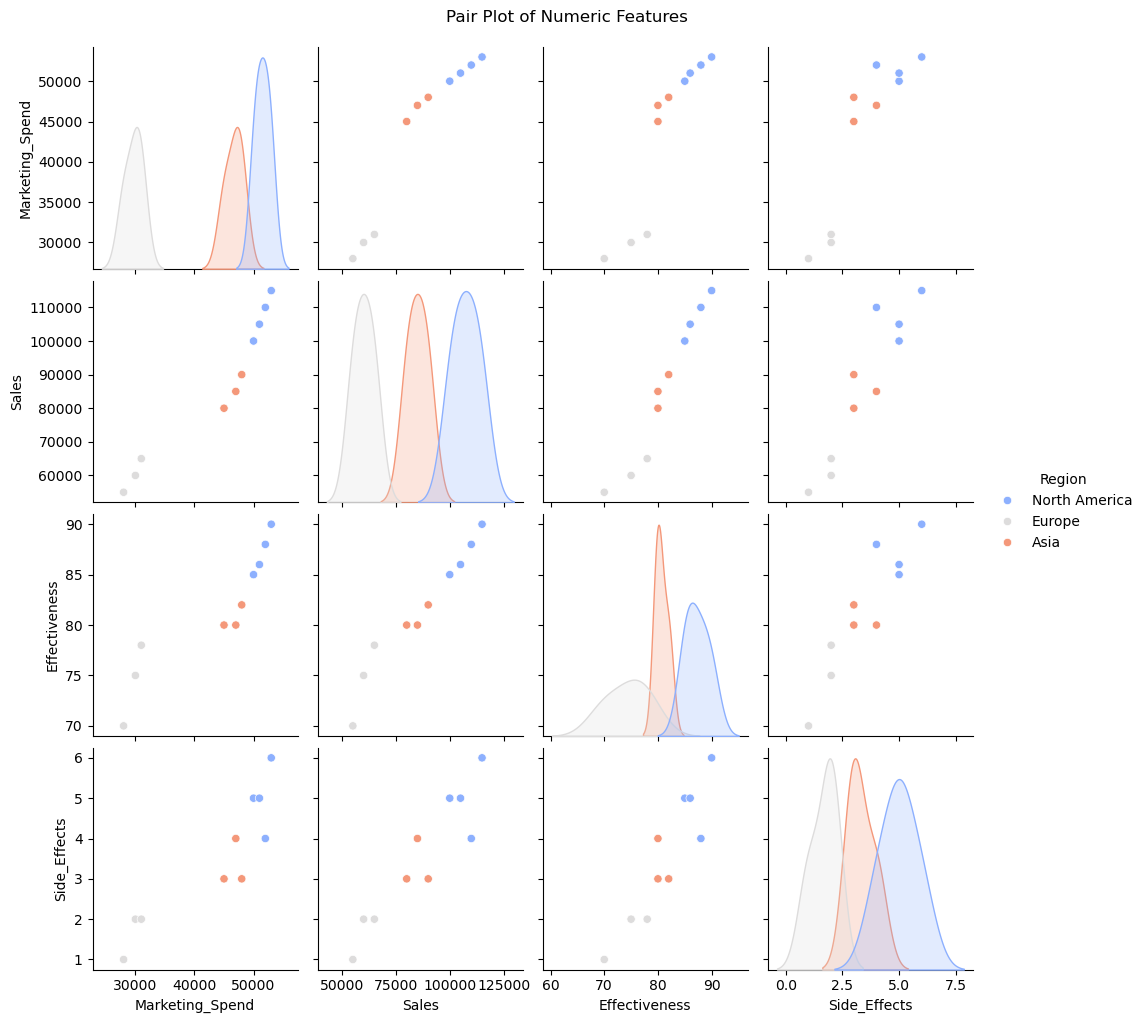


Decision Tree Model Evaluation:
Mean Squared Error (MSE): 25000000.0
R-squared Score: 0.84

Feature Importance:
           Feature  Importance
1    Effectiveness    0.833586
2     Side_Effects    0.084596
0  Marketing_Spend    0.081818


C:\Users\likit\AppData\Local\Temp\ipykernel_27408\1695882898.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='plasma')


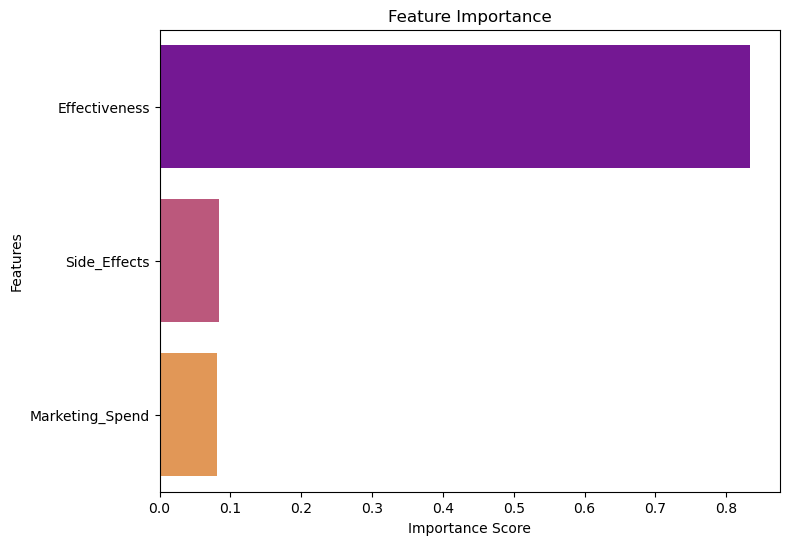

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
file_path = 'Day_13_Pharma_data.csv'
data = pd.read_csv(file_path)

# Step 1: Group Analysis
# Summarize sales by region
region_sales = data.groupby('Region')['Sales'].sum().reset_index()
print("\nSales by Region:")
print(region_sales)

# Summarize sales by product
product_sales = data.groupby('Product_Name')['Sales'].sum().reset_index()
print("\nSales by Product:")
print(product_sales)

# Step 2: Visualizations
# Bar plot: Sales by Region
plt.figure(figsize=(8, 6))
sns.barplot(data=region_sales, x='Region', y='Sales', palette='viridis')
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

# Pair plot for numerical columns
sns.pairplot(data, vars=['Marketing_Spend', 'Sales', 'Effectiveness', 'Side_Effects'], hue='Region', palette='coolwarm')
plt.suptitle("Pair Plot of Numeric Features", y=1.02)
plt.show()

# Step 3: Predictive Modeling using Decision Tree Regressor
# Features and target variable
X = data[['Marketing_Spend', 'Effectiveness', 'Side_Effects']]
y = data['Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Model Evaluation
print("\nDecision Tree Model Evaluation:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Step 4: Visualization of Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='plasma')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()
